![logo](../../picture/license_header_logo.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Data Preprocessing Techniques

## Introduction
In this hands-on, we will introduce some of the techniques for handling different types of data.
>**Instruction**:<br>
The instructor will code with you and guide you in the process of dealing with multiple kinds of time series data problem like missing data, outlier, etc.
You are required to complete the exercise after the demonstration.

## What will we accomplish?
At the end of this lab, you will be able to:
1. Identify the missing data and ways to handle it.
2. Identify outliers and ways to handle it
3. Correct handle different type of time series data.


# Eg . 1 - Missing Data 

>Why is there a need to handle missing data in the Time Series dataset?<br>
This is because most of the ML & DL are not designed to deal with missing values. Hence, to make the learning models work effectively, the time series has to be in a continuous form.

First,import the library needed for this hands-on 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read CSV data 
df=pd.read_csv("https://raw.githubusercontent.com/drnesr/WaterConsumption/master/data/SampleData.csv")
df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [3]:
# Converting the column to DateTime format
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


## Eg. 1.1 - Check the 'NaN' value availability 

There are two ways to check the presence of `NaN` values in the data:
1. `df.info()` - check the total number of data is not `Null` for each column
2. `df.isnull().any()` - boolean check the availability of `NaN` value for each columns
3. Time plot visualization

### Eg. 1.1.1 - Use `df.info`

In [4]:
# df.info is use to check how many data is not Null per column 
### BEGIN SOLUTION

### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   reference  96 non-null     float64
 1   target     75 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


### Eg. 1.1.2 - Use `df.isnull().any()`

In [5]:
# True means there is a NaN value in the columns
### BEGIN SOLUTION

### END SOLUTION

reference    False
target        True
dtype: bool

In [6]:
# count how many NaN value in the column
df.isnull().sum()

reference     0
target       21
dtype: int64

### Eg. 1.1.3 - Time plot visualization

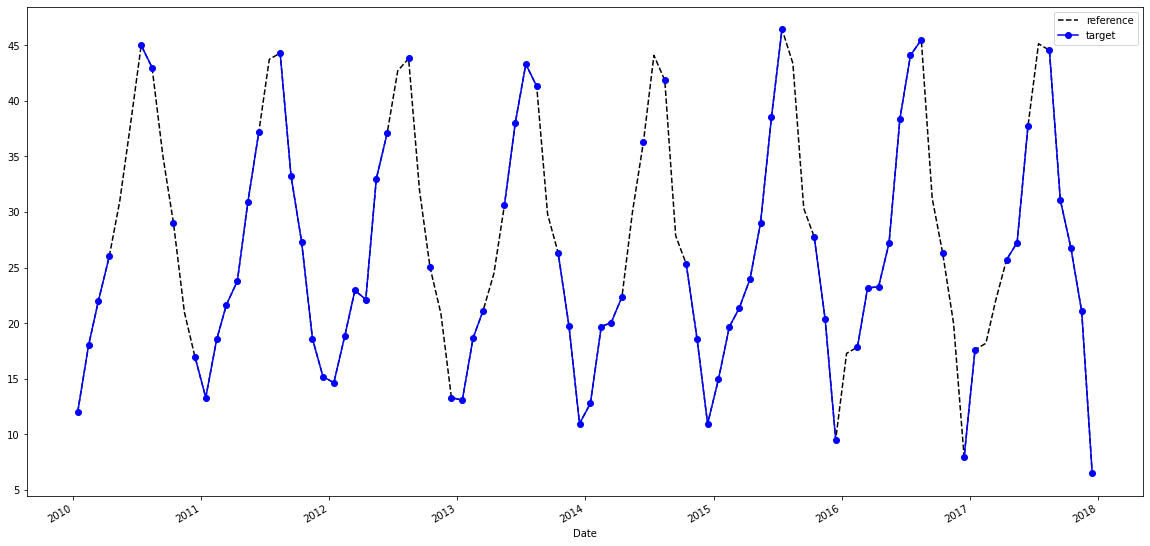

In [7]:
## Visualize the plot
# From the below time series plot , we can see that there are some missing data shown.
df.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

## Eg. 1.2 - Imputing missing values
Pandas has a function that is used to impute the missing data called `df.fillna`. It allows the user to select the type of imputing method to fill the `NaN` value.

Method:
1. Imputing with zero value
2. Impute using the mean & median values
3. Impute using the rolling average
4. Imputing using interpolation with different methods
5. Imputing by filling the value from dataset

For details, please refer [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

### Eg. 1.2.1 - Imputing with zero value

In [8]:
### BEGIN SOLUTION

### END SOLUTION
df.head(6)

,reference,target,FillZero
Date,,,
2010-01-15,12.0,12.0,12.0
2010-02-15,18.0,18.0,18.0
2010-03-15,22.0,22.0,22.0
2010-04-15,26.0,26.0,26.0
2010-05-15,31.0,NaN,0.0
2010-06-15,38.0,NaN,0.0


### Eg. 1.2.2 - Impute using the mean & median values

In [9]:
### BEGIN SOLUTION

### END SOLUTION
df.head(6)

,reference,target,FillZero,FillMean
Date,,,,
2010-01-15,12.0,12.0,12.0,12.000000
2010-02-15,18.0,18.0,18.0,18.000000
2010-03-15,22.0,22.0,22.0,22.000000
2010-04-15,26.0,26.0,26.0,26.000000
2010-05-15,31.0,NaN,0.0,25.887473
2010-06-15,38.0,NaN,0.0,25.887473


In [10]:
### BEGIN SOLUTION

### END SOLUTION
df.head(6)

,reference,target,FillZero,FillMean,FillMedian
Date,,,,,
2010-01-15,12.0,12.0,12.0,12.000000,12.000000
2010-02-15,18.0,18.0,18.0,18.000000,18.000000
2010-03-15,22.0,22.0,22.0,22.000000,22.000000
2010-04-15,26.0,26.0,26.0,26.000000,26.000000
2010-05-15,31.0,NaN,0.0,25.887473,23.787254
2010-06-15,38.0,NaN,0.0,25.887473,23.787254


### Eg 1.2.3 - Impute using the rolling average

In [11]:
### BEGIN SOLUTION

### END SOLUTION
df.head(6)

,reference,target,FillZero,FillMean,FillMedian,RollingMean
Date,,,,,,
2010-01-15,12.0,12.0,12.0,12.000000,12.000000,12.0
2010-02-15,18.0,18.0,18.0,18.000000,18.000000,18.0
2010-03-15,22.0,22.0,22.0,22.000000,22.000000,22.0
2010-04-15,26.0,26.0,26.0,26.000000,26.000000,26.0
2010-05-15,31.0,NaN,0.0,25.887473,23.787254,19.5
2010-06-15,38.0,NaN,0.0,25.887473,23.787254,19.5


### Eg 1.2.4 - Imputing using interpolation with different methods

In [12]:
### BEGIN SOLUTION

### END SOLUTION
df.head(6)

,reference,target,FillZero,FillMean,FillMedian,RollingMean,InterpolateLinear,InterpolateTime,InterpolateQuadratic,InterpolateCubic
Date,,,,,,,,,,
2010-01-15,12.0,12.0,12.0,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000
2010-02-15,18.0,18.0,18.0,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000
2010-03-15,22.0,22.0,22.0,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000
2010-04-15,26.0,26.0,26.0,26.000000,26.000000,26.0,26.000000,26.000000,26.000000,26.000000
2010-05-15,31.0,NaN,0.0,25.887473,23.787254,19.5,32.333333,32.263736,32.500323,32.891644
2010-06-15,38.0,NaN,0.0,25.887473,23.787254,19.5,38.666667,38.736264,41.271191,40.737470


### Eg 1.2.5 - Imputing by filling the value from the dataset
This imputing method is filling the `NaN` value with the value from the dataset itself.<br>

It consists of two methods: <br>
1. `df.fillna(method='ffill')` - Last observation carried forward (LOCF)
2. `df.fillna(method='bfill')` - Next observation carried backward (NOCB)

In [13]:
### BEGIN SOLUTION

### END SOLUTION
df.head(6)


,reference,target,FillZero,FillMean,FillMedian,RollingMean,InterpolateLinear,InterpolateTime,InterpolateQuadratic,InterpolateCubic,ForwardFill
Date,,,,,,,,,,,
2010-01-15,12.0,12.0,12.0,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.0
2010-02-15,18.0,18.0,18.0,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.0
2010-03-15,22.0,22.0,22.0,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.0
2010-04-15,26.0,26.0,26.0,26.000000,26.000000,26.0,26.000000,26.000000,26.000000,26.000000,26.0
2010-05-15,31.0,NaN,0.0,25.887473,23.787254,19.5,32.333333,32.263736,32.500323,32.891644,26.0
2010-06-15,38.0,NaN,0.0,25.887473,23.787254,19.5,38.666667,38.736264,41.271191,40.737470,26.0


In [14]:
### BEGIN SOLUTION

### END SOLUTION
df.head(7)

,reference,target,FillZero,FillMean,FillMedian,RollingMean,InterpolateLinear,InterpolateTime,InterpolateQuadratic,InterpolateCubic,ForwardFill,BackwardFill
Date,,,,,,,,,,,,
2010-01-15,12.0,12.0,12.0,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.0,12.0
2010-02-15,18.0,18.0,18.0,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.0,18.0
2010-03-15,22.0,22.0,22.0,22.000000,22.000000,22.0,22.000000,22.000000,22.000000,22.000000,22.0,22.0
2010-04-15,26.0,26.0,26.0,26.000000,26.000000,26.0,26.000000,26.000000,26.000000,26.000000,26.0,26.0
2010-05-15,31.0,NaN,0.0,25.887473,23.787254,19.5,32.333333,32.263736,32.500323,32.891644,26.0,45.0
2010-06-15,38.0,NaN,0.0,25.887473,23.787254,19.5,38.666667,38.736264,41.271191,40.737470,26.0,45.0
2010-07-15,45.0,45.0,45.0,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.0,45.0


# Eg. 2 - Outlier Handling 

Ways to identify outliers:
1. Visualize time plot 
2. Boxplot
3. Check the statistical properties of the dataset


Ways to handle outliers:
1. Treat them as missing data points

2. Correct them with linear interpolation

3. Cap the data until a certain range


In [15]:
# Create synthetic data with outlier

# seed 
np.random.seed(123)

# Random integer data generate
outlier_data = np.random.randint(0,10, size=100)

# Generate some outlier
outlier_data[50] = 15
outlier_data[20] = 20
outlier_data[60] = 25
outlier_data[25] = -20
outlier_data[30] = -30

# Convert the Numpy data into Series
outlier_series = pd.DataFrame(outlier_data,columns =['Outlier'])

## Eg. 2.1 - Outlier Identification
1. Time plot visualization 
2. Use boxplot
3. Check the statistical properties of the dataset

### Eg. 2.1.1 - Time plot visualization
We can visualize the outlier by plotting a time plot.

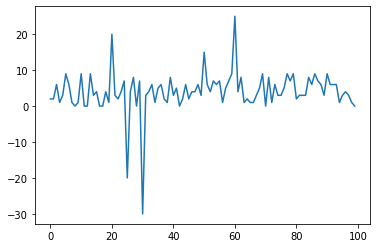

In [16]:
# Time plot
### BEGIN SOLUTION

### END SOLUTION

### Eg. 2.1.2  - Boxplot
We can also use a boxplot to see if there are any outliers existing in our data.

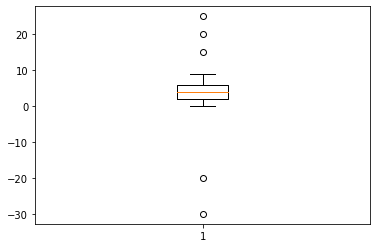

In [17]:
### BEGIN SOLUTION

### END SOLUTION

plt.show()

### Eg. 2.1.3 - Check the statistical properties of the dataset
Pandas library provides a function called `df.describe()` to check the statistical properties of the dataset.<br>

For example:<br>
As shown in the statistical properties below, the mean of the data is 4.3, standard deviation is about 5.80 but the min and max is deviating from the standard deviation. Hence, it is proof that there is an outlier data point inside.

In [18]:
### BEGIN SOLUTION

### END SOLUTION

,Outlier
count,100.000000
mean,4.030000
std,5.762041
min,-30.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,25.000000


## Eg 2.2 - Outlier Treatment
Ways to handle outliers:
1. Treat the outliers as missing data points

2. Correct the outliers with linear interpolation

3. Cap the outliers with a certain range

First, we need to find out the 10% and 90% quantile of the dataset and set it as the threshold for the outliers. Any data beyond the threshold will be treated as outliers.


In [19]:
### BEGIN SOLUTION

### END SOLUTION
print(f"10% quantile : {ten_percent_quantile}")
print(f"90% quantile : {ninety_percent_quantile}")

10% quantile : 0.0
90% quantile : 9.0


### Eg. 2.2.1 -  Treat the outliers as a missing data point
Use `np.where()` to sort the data that is beyond the threshold and assign it with `NaN`

In [20]:
# Sort the data that is beyond the threshold and assign it with np.nan value
### BEGIN SOLUTION

### END SOLUTION
fill_nan

array([ 2.,  2.,  6.,  1.,  3.,  9.,  6.,  1.,  0.,  1.,  9.,  0.,  0.,
        9.,  3.,  4.,  0.,  0.,  4.,  1., nan,  3.,  2.,  4.,  7., nan,
        4.,  8.,  0.,  7., nan,  3.,  4.,  6.,  1.,  5.,  6.,  2.,  1.,
        8.,  3.,  5.,  0.,  2.,  6.,  2.,  4.,  4.,  6.,  3., nan,  6.,
        4.,  7.,  6.,  7.,  1.,  5.,  7.,  9., nan,  4.,  8.,  1.,  2.,
        1.,  1.,  3.,  5.,  9.,  0.,  8.,  1.,  6.,  3.,  3.,  5.,  9.,
        7.,  9.,  2.,  3.,  3.,  3.,  8.,  6.,  9.,  7.,  6.,  3.,  9.,
        6.,  6.,  6.,  1.,  3.,  4.,  3.,  1.,  0.])

In [21]:
pd.Series(fill_nan).isnull().sum()

5

### Eg. 2.2.2 - Correct them with linear interpolation
Use `np.where()` sort the data that is beyond the threshold and assign it with the value of `0`. Then perform linear interpolation with `df.interpolate(method='linear')`

In [22]:
# Sort the data that is beyond the threshold and assign it with np.nan value
### BEGIN SOLUTION

### END SOLUTION
fill_nan

array([ 2.,  2.,  6.,  1.,  3.,  9.,  6.,  1.,  0.,  1.,  9.,  0.,  0.,
        9.,  3.,  4.,  0.,  0.,  4.,  1., nan,  3.,  2.,  4.,  7., nan,
        4.,  8.,  0.,  7., nan,  3.,  4.,  6.,  1.,  5.,  6.,  2.,  1.,
        8.,  3.,  5.,  0.,  2.,  6.,  2.,  4.,  4.,  6.,  3., nan,  6.,
        4.,  7.,  6.,  7.,  1.,  5.,  7.,  9., nan,  4.,  8.,  1.,  2.,
        1.,  1.,  3.,  5.,  9.,  0.,  8.,  1.,  6.,  3.,  3.,  5.,  9.,
        7.,  9.,  2.,  3.,  3.,  3.,  8.,  6.,  9.,  7.,  6.,  3.,  9.,
        6.,  6.,  6.,  1.,  3.,  4.,  3.,  1.,  0.])

In [23]:
# Convert the Numpy array to Series to enable it to use interpolate function in Pandas library
fill_nan = pd.Series(fill_nan)

<AxesSubplot:>

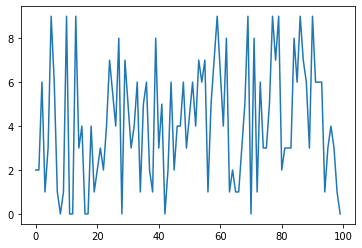

In [24]:
# Perform linear interpolation
### BEGIN SOLUTION
fill_nan =  fill_nan.interpolate(method='linear')
### END SOLUTION
fill_nan.plot()

In [25]:
#Show nan value that been replaced using linear interpolation
np.array(fill_nan)

array([2. , 2. , 6. , 1. , 3. , 9. , 6. , 1. , 0. , 1. , 9. , 0. , 0. ,
       9. , 3. , 4. , 0. , 0. , 4. , 1. , 2. , 3. , 2. , 4. , 7. , 5.5,
       4. , 8. , 0. , 7. , 5. , 3. , 4. , 6. , 1. , 5. , 6. , 2. , 1. ,
       8. , 3. , 5. , 0. , 2. , 6. , 2. , 4. , 4. , 6. , 3. , 4.5, 6. ,
       4. , 7. , 6. , 7. , 1. , 5. , 7. , 9. , 6.5, 4. , 8. , 1. , 2. ,
       1. , 1. , 3. , 5. , 9. , 0. , 8. , 1. , 6. , 3. , 3. , 5. , 9. ,
       7. , 9. , 2. , 3. , 3. , 3. , 8. , 6. , 9. , 7. , 6. , 3. , 9. ,
       6. , 6. , 6. , 1. , 3. , 4. , 3. , 1. , 0. ])

### Eg. 2.2.3 - Cap the outliers with a certain range
Use `np.where()` to sort the data that is beyond the threshold and assign it with respective quantile value.

<AxesSubplot:>

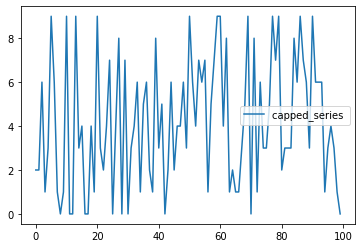

In [26]:
# Sort the data that is beyong with the threshold and assign it with respective quantile value.
### BEGIN SOLUTION

### END SOLUTION
capped_series  = pd.DataFrame(capped_series,columns = ['capped_series '])
capped_series.plot()

# Eg. 3 - Different types of data handling techniques  

In [27]:
# Create synthetic data 
date = pd.DataFrame({'Date': pd.date_range('2020-01-01', '2020-02-03', freq='1H', closed='left')})
# reproducibility
np.random.seed(123)

# time component
time = np.arange(len(date))

# data
noise = np.random.normal(loc=0, scale=6.5, size=len(time))
trend = time * 2.75
seasonality = 10 + np.sin(time * 0.25) * 20
data = trend + seasonality + noise
data = pd.Series(data)

## Eg. 3.1 - Cumulative Data 
Sometimes the data comes in cumulative form. To perform the time series prediction, you need to remove the accumulation by using `cumulative - cumulative.shift().fillna(0)` 

In [28]:
# Create synthetic cummulative data
### BEGIN SOLUTION

### END SOLUTION

In [29]:
# Remove cummualative 
### BEGIN SOLUTION

### END SOLUTION

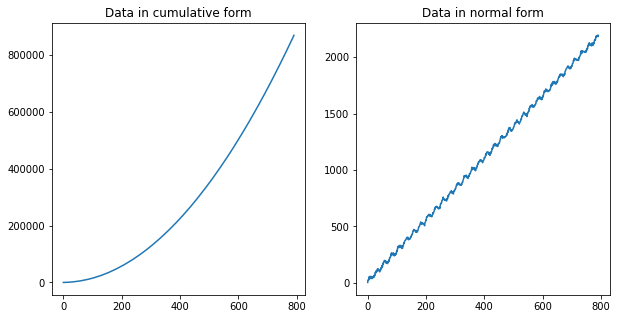

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(cumulative)
ax2.plot(remove_cumulative)
ax1.title.set_text('Data in cumulative form')
ax2.title.set_text('Data in normal form')

## Eg. 3.2 - Hourly Data
Sometimes the data may be in an hourly frequency, but you're doing an analysis that requires data to be in a daily basis. This type of processing is possible using `df.resample('D').sum()`.

In [31]:
# Create the hourly synthetic data 
### BEGIN SOLUTION

### END SOLUTION
rand_data.head()

,Random_Data
Date,
2020-01-01 00:00:00,2.943401
2020-01-01 01:00:00,24.180825
2020-01-01 02:00:00,26.927871
2020-01-01 03:00:00,22.091860
2020-01-01 04:00:00,34.068518


Using `df.resample('D').sum()`, every hourly data will be summed up into daily frequency.

In [32]:
### BEGIN SOLUTION

### END SOLUTION
resample_data.head()

,Random_Data
Date,
2020-01-01,1035.880847
2020-01-02,2547.314940
2020-01-03,4234.612322
2020-01-04,5770.604876
2020-01-05,7336.365689


## Eg. 3.3 - Change the data type to float 
Sometimes we might need to change the data type to perform analysis. For example, data that is a numerical value may be in a `String` type. Hence, use `df.astype(dtype)` to cast the data to the `float` data type.

In [33]:
# Change the data type of `Random_Data` to String type and save it as `String_Random_Data`
### BEGIN SOLUTION

### END SOLUTION

In [34]:
# Examine each data type in the DataFrame
rand_data.dtypes

Random_Data           float64
String_Random_Data     object
dtype: object

In [35]:
rand_data.head()

,Random_Data,String_Random_Data
Date,,
2020-01-01 00:00:00,2.943401,2.9434010785463522
2020-01-01 01:00:00,24.180825,24.180824587883762
2020-01-01 02:00:00,26.927871,26.92787100942201
2020-01-01 03:00:00,22.091860,22.091859559999087
2020-01-01 04:00:00,34.068518,34.06851805836244


Some of the Pandas function will not work as the data is in `object` data type.For example,`rand_data.resample('D').sum()` will not work in `String_Random_Data`.

In [36]:
### BEGIN SOLUTION

### END SOLUTION
resample_data.head()

,Random_Data
Date,
2020-01-01,1035.880847
2020-01-02,2547.314940
2020-01-03,4234.612322
2020-01-04,5770.604876
2020-01-05,7336.365689


Hence, we need to cast the `String_Random_Data` to float.

In [37]:
# Cast data to float data type
### BEGIN SOLUTION

### END SOLUTION

In [38]:
# Examine each data type in the DataFrame
rand_data.dtypes

Random_Data           float64
String_Random_Data    float64
dtype: object

In [39]:
# df.resample('D').sum() result after casting 
resample_data = rand_data.resample('D').sum()
resample_data.head()

,Random_Data,String_Random_Data
Date,,
2020-01-01,1035.880847,1035.880847
2020-01-02,2547.314940,2547.314940
2020-01-03,4234.612322,4234.612322
2020-01-04,5770.604876,5770.604876
2020-01-05,7336.365689,7336.365689


# Ex. 1 Exercise for Data Preprocessing Techniques
## Introduction 
You are given a set of data that contain a few problems like missing data, outliers, etc.<br> 

*The COVID-19 dataset used in this exercise is synthetic.*

>**Details of Data**: <br>
Cases    : The number of COVID-19 cases in Wonder Land<br>
Discharged    : The number of discharged patients from Hospital <br>
Death    : Number of deceased COVID-19 patients.<br>
ICU    : Number of patients in ICU<br>

>**Instruction**: <br>
Perform suitable data analysis and select the correct method to handle the problematic data.




>**Expected Result**:<br>
For the first 5 rows:

date|	Cases|	Discharged|	Death|	ICU
---|---|---|---|---				
01/03/2020|	29.0|	22.0|	0.0|	0.0
02/03/2020|	0.0|	0.0|	0.0|	0.0
03/03/2020|	7.0|	0.0|	0.0|	0.0
04/03/2020|	14.0|	0.0|	0.0|	0.0
05/03/2020|	0.0|	0.0|	0.0|	0.0

In [40]:
# Read the CSV data
covid_data = pd.read_csv("../../datasets/others/covid-19_dummy.csv")
covid_data = covid_data.set_index('date')
covid_data.head()

,Unnamed: 0,Cases,Discharged,Death,ICU
date,,,,,
01/03/2020,0,29,22.0,0.0,0
02/03/2020,1,29,NaN,0.0,0
03/03/2020,2,36,NaN,0.0,0
04/03/2020,3,50,NaN,0.0,0
05/03/2020,4,50,NaN,0.0,-10


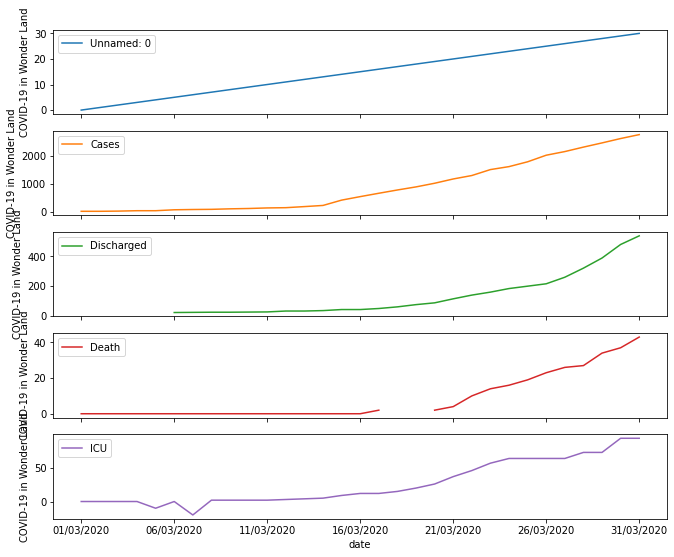

In [41]:
# Visualization
axes = covid_data[covid_data.columns].plot(alpha=1.0, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('COVID-19 in Wonder Land')

In [42]:
### BEGIN SOLUTION
 
### END SOLUTION

,Cases,Discharged,Death,ICU
date,,,,
01/03/2020,29.0,22.0,0.0,0.0
02/03/2020,0.0,0.0,0.0,0.0
03/03/2020,7.0,0.0,0.0,0.0
04/03/2020,14.0,0.0,0.0,0.0
05/03/2020,0.0,0.0,0.0,0.0


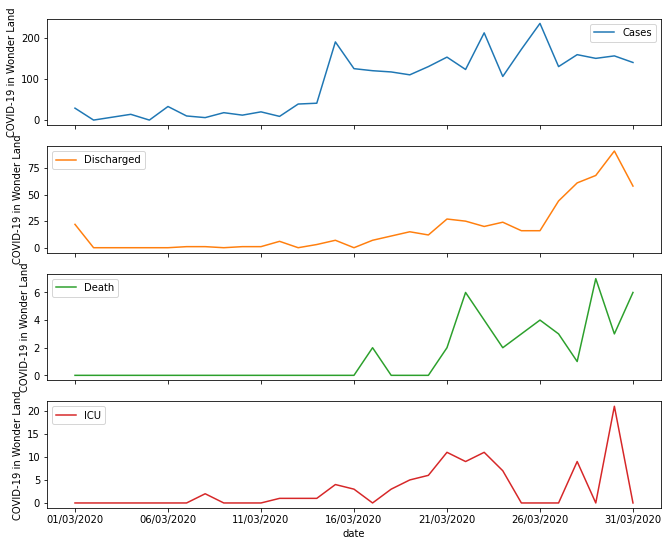

In [43]:
axes = process_covid[process_covid.columns].plot(alpha=1.0, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('COVID-19 in Wonder Land')

# Reference
1. [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
2. [Imputing the time-series using python.](https://drnesr.medium.com/filling-gaps-of-a-time-series-using-python-d4bfddd8c460)
3. [Day 19: The easiest way to remove outliers from time series data](https://neuraljojo.medium.com/day-19-the-easiest-way-to-remove-outliers-from-time-series-data-d7a3f322d759)
4. [Cleaning up Data from Outliers](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)